BƯỚC 0: KIỂM TRA VÀ KHÁM PHÁ DỮ LIỆU

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1. Load dữ liệu
print("Đang đọc dữ liệu từ 'train_balanced.csv'...")
df = pd.read_csv('train_balanced.csv')

Đang đọc dữ liệu từ 'train_balanced.csv'...


In [4]:
# 2. Kiểm tra 5 dòng đầu
print("\n--- 5 dòng đầu tiên ---")
display(df.head())


--- 5 dòng đầu tiên ---


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,-0.167619,-0.424070,-0.490039,-0.067601,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.0,0.0,1.0,2.0,0.0,0.0,0.0
1,0,-0.722991,-0.424070,-0.238631,-0.067601,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,1.0,4.0,0.0,0.0,0.0
2,0,-0.147166,-0.424070,-0.490039,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,11.0,0.0,1.0,4.0,0.0,0.0,0.0
3,0,-1.003038,-0.424070,0.389886,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,1.0,2.0,0.0,1.0,0.0
4,1,-0.000849,3.349118,-0.490039,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
# 3. Kiểm tra thông tin tổng quát (Xem có bị Null không)
print("\n--- Thông tin dữ liệu ---")
print(df.info())


--- Thông tin dữ liệu ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HeartDisease                         40000 non-null  int64  
 1   BMI                                  40000 non-null  float64
 2   PhysicalHealth                       40000 non-null  float64
 3   MentalHealth                         40000 non-null  float64
 4   SleepTime                            40000 non-null  float64
 5   Race_American Indian/Alaskan Native  40000 non-null  float64
 6   Race_Asian                           40000 non-null  float64
 7   Race_Black                           40000 non-null  float64
 8   Race_Hispanic                        40000 non-null  float64
 9   Race_Other                           40000 non-null  float64
 10  Race_White                           40000 non-null  float64
 11  S


--- Phân bố nhãn (HeartDisease) ---
HeartDisease
0    20000
1    20000
Name: count, dtype: int64


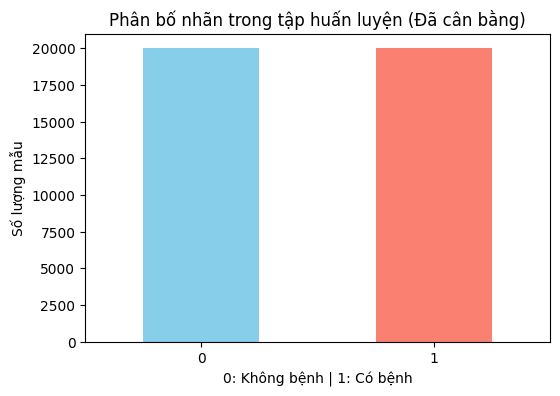

In [6]:
# 4. Kiểm tra độ cân bằng lớp
print("\n--- Phân bố nhãn (HeartDisease) ---")
counts = df['HeartDisease'].value_counts()
print(counts)

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Phân bố nhãn trong tập huấn luyện (Đã cân bằng)")
plt.xlabel("0: Không bệnh | 1: Có bệnh")
plt.ylabel("Số lượng mẫu")
plt.xticks(rotation=0)
plt.show()

In [7]:
# 5. Kiểm tra giá trị thiếu (NaN)
if df.isnull().sum().sum() > 0:
    print("\nCẢNH BÁO: Dữ liệu có chứa giá trị Null! Cần xử lý ngay.")
else:
    print("\nOK: Dữ liệu sạch, không có giá trị Null.")


OK: Dữ liệu sạch, không có giá trị Null.


**Bước 1: Khởi tạo Class và Hàm hỗ trợ**

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===============================
# 1. Softmax Regression (From Scratch - Chuẩn)
# ===============================
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, n_classes=2, random_state=42):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.n_classes = n_classes
        self.weights = None
        self.bias = None
        self.losses = []
        np.random.seed(random_state)

    def _initialize_parameters(self, n_features):
        self.weights = np.random.randn(n_features, self.n_classes) * 0.01
        self.bias = np.zeros((1, self.n_classes))

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _one_hot_encode(self, y):
        one_hot = np.zeros((len(y), self.n_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot

    def _cross_entropy_loss(self, y_true, y_pred):
        # thêm epsilon tránh log(0)
        eps = 1e-15
        return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)
        y_encoded = self._one_hot_encode(y)

        for epoch in range(self.epochs):
            # Forward
            logits = np.dot(X, self.weights) + self.bias
            y_pred = self._softmax(logits)

            # Loss
            loss = self._cross_entropy_loss(y_encoded, y_pred)
            self.losses.append(loss)

            # Gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_encoded))
            db = (1 / n_samples) * np.sum(y_pred - y_encoded, axis=0, keepdims=True)

            # Update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # in loss
            if epoch % 500 == 0:
                print(f"Epoch {epoch}/{self.epochs} - Loss: {loss:.4f}")

    def predict_proba(self, X):
        logits = np.dot(X, self.weights) + self.bias
        return self._softmax(logits)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)


**Bước 2: Tìm tham số tốt nhất (Hyperparameter Tuning)**

In [11]:
# Load dữ liệu cân bằng
df = pd.read_csv('train_balanced.csv')
X = df.drop('HeartDisease', axis=1).values
y = df['HeartDisease'].values

# Chia tập Train/Val (80/20) để tìm tham số
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search thủ công
learning_rates = [0.01, 0.1, 0.5]
epochs_options = [1000, 3000, 5000]

best_acc = 0
best_params = {}

print("Đang tìm tham số tốt nhất...")
for lr in learning_rates:
    for ep in epochs_options:
        model = SoftmaxRegression(learning_rate=lr, epochs=ep, n_classes=2)
        model.fit(X_train, y_train)

        y_pred_val = model.predict(X_val)
        acc = np.mean(y_pred_val == y_val)

        print(f"LR={lr}, Epochs={ep} -> Val Accuracy={acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_params = {'learning_rate': lr, 'epochs': ep}

print(f"\nTHAM SỐ TỐT NHẤT: {best_params} với Accuracy: {best_acc:.4f}")

Đang tìm tham số tốt nhất...
Epoch 0/1000 - Loss: 0.6727
Epoch 500/1000 - Loss: 0.5187
LR=0.01, Epochs=1000 -> Val Accuracy=0.7510
Epoch 0/3000 - Loss: 0.6727
Epoch 500/3000 - Loss: 0.5187
Epoch 1000/3000 - Loss: 0.5127
Epoch 1500/3000 - Loss: 0.5092
Epoch 2000/3000 - Loss: 0.5067
Epoch 2500/3000 - Loss: 0.5048
LR=0.01, Epochs=3000 -> Val Accuracy=0.7591
Epoch 0/5000 - Loss: 0.6727
Epoch 500/5000 - Loss: 0.5187
Epoch 1000/5000 - Loss: 0.5127
Epoch 1500/5000 - Loss: 0.5092
Epoch 2000/5000 - Loss: 0.5067
Epoch 2500/5000 - Loss: 0.5048
Epoch 3000/5000 - Loss: 0.5033
Epoch 3500/5000 - Loss: 0.5020
Epoch 4000/5000 - Loss: 0.5010
Epoch 4500/5000 - Loss: 0.5001
LR=0.01, Epochs=5000 -> Val Accuracy=0.7635
Epoch 0/1000 - Loss: 0.6727
Epoch 500/1000 - Loss: 0.6943
LR=0.1, Epochs=1000 -> Val Accuracy=0.6744
Epoch 0/3000 - Loss: 0.6727
Epoch 500/3000 - Loss: 0.6943
Epoch 1000/3000 - Loss: 0.6832
Epoch 1500/3000 - Loss: 0.6782
Epoch 2000/3000 - Loss: 0.6754
Epoch 2500/3000 - Loss: 0.6737
LR=0.1, Ep

Bước3: Huấn luyện lại & Đánh giá trên dữ liệu thực (Gốc)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# --- BƯỚC 3: HUẤN LUYỆN LẠI VÀ ĐÁNH GIÁ ---

print("⏳ Đang huấn luyện lại model tốt nhất...")
# 1. Train lại model trên toàn bộ dữ liệu cân bằng (X, y đã có từ Bước 2)
final_model = SoftmaxRegression(
    learning_rate=best_params['learning_rate'],
    epochs=best_params['epochs'],
    n_classes=2
)
final_model.fit(X, y)

# 2. Load dữ liệu gốc (Imbalanced) để kiểm tra thực tế
df_root = pd.read_csv('heart_2020_processed.csv')
X_root = df_root.drop('HeartDisease', axis=1).values
y_root = df_root['HeartDisease'].values

# 3. Chia tập test từ dữ liệu gốc (20%)
_, X_test_root, _, y_test_root = train_test_split(
    X_root, y_root, test_size=0.2, random_state=42
)

# 4. Dự đoán
y_pred_root = final_model.predict(X_test_root)

# 5. Tính toán Metrics
cm_root = confusion_matrix(y_test_root, y_pred_root)
precision_root = precision_score(y_test_root, y_pred_root)
recall_root = recall_score(y_test_root, y_pred_root)
f1_root = f1_score(y_test_root, y_pred_root)
acc_root = accuracy_score(y_test_root, y_pred_root)

print("\n=== KẾT QUẢ TRÊN DỮ LIỆU GỐC (IMBALANCED) ===")
print(f"Accuracy : {acc_root:.4f}")
print(f"Precision: {precision_root:.4f}")
print(f"Recall   : {recall_root:.4f}  )
print(f"F1-score : {f1_root:.4f}")
print("\nConfusion Matrix:\n", cm_root)

⏳ Đang huấn luyện lại model tốt nhất...
Epoch 0/5000 - Loss: 0.6726
Epoch 500/5000 - Loss: 0.5180
Epoch 1000/5000 - Loss: 0.5119
Epoch 1500/5000 - Loss: 0.5084
Epoch 2000/5000 - Loss: 0.5059
Epoch 2500/5000 - Loss: 0.5039
Epoch 3000/5000 - Loss: 0.5024
Epoch 3500/5000 - Loss: 0.5012
Epoch 4000/5000 - Loss: 0.5001
Epoch 4500/5000 - Loss: 0.4992

=== KẾT QUẢ TRÊN DỮ LIỆU GỐC (IMBALANCED) ===
Accuracy : 0.7428
Precision: 0.2222
Recall   : 0.7765  <-- Chỉ số quan trọng nhất (Phát hiện bệnh)
F1-score : 0.3455

Confusion Matrix:
 [[43168 15199]
 [ 1250  4342]]


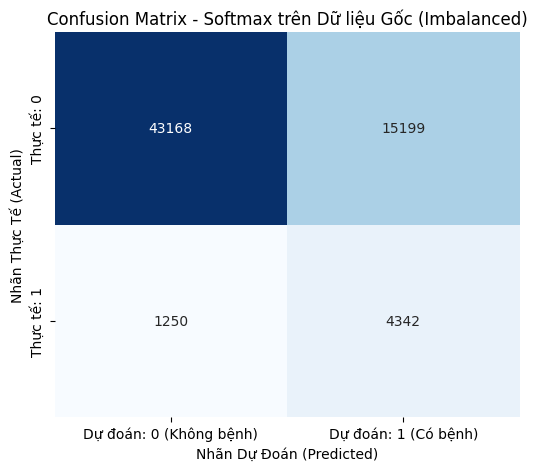

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ Confusion Matrix dạng Heatmap cho trực quan
plt.figure(figsize=(6, 5))
sns.heatmap(cm_root, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Dự đoán: 0 (Không bệnh)', 'Dự đoán: 1 (Có bệnh)'],
            yticklabels=['Thực tế: 0', 'Thực tế: 1'])
plt.xlabel('Nhãn Dự Đoán (Predicted)')
plt.ylabel('Nhãn Thực Tế (Actual)')
plt.title('Confusion Matrix - Softmax trên Dữ liệu Gốc (Imbalanced)')
plt.show()

NHẬN XÉT KẾT QUẢ :

Về khả năng phát hiện bệnh (Recall):

Quan sát biểu đồ Confusion Matrix, mô hình phát hiện đúng được 4,342 ca bệnh (True Positive).

Chỉ số Recall đạt ~77.6%, cao vượt trội so với các mô hình cây quyết định chưa xử lý cân bằng (thường < 10%). Điều này cho thấy Softmax rất hiệu quả trong việc "sàng lọc" bệnh nhân.